<a href="https://colab.research.google.com/github/abdonmorales/UTSA-PythonBootCamp/blob/project/Project_Template_Meteors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import curses as crs
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate,stats
import json
from urllib.request import urlopen

You will be working with data recorded by Nasa and provided publically online. You can find the data [here](https://cneos.jpl.nasa.gov/nhats/#). The dataset records an array of information on near earth astroids, and is provided for users to identify asteroids that will be traveling near the earth and their properties. We will focus on three of these properties, which are described below:



1.   min_size : The minimum estimated size of the object
2.   max_size : The maximum estimated size of the object
3.   h : The absolute visual magnitude of the object

You will process this data and make conclusions about it through the use of data analysis methods. 

In [3]:
url = "https://ssd-api.jpl.nasa.gov/nhats.api"
response = urlopen(url)
data_json = json.loads(response.read())
data = pd.DataFrame(data_json["data"])[['h','min_size','max_size']].astype(float)
del data_json

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   h         4337 non-null   float64
 1   min_size  4337 non-null   float64
 2   max_size  4337 non-null   float64
dtypes: float64(3)
memory usage: 101.8 KB
None
      h  min_size  max_size
0  25.1      17.0      74.0
1  21.7      81.0     362.0
2  26.6       8.3      37.0
3  24.6      21.0      94.0
4  26.0      11.0      49.0
                 h     min_size     max_size
count  4337.000000  4337.000000  4337.000000
mean     25.804312    20.539760    91.883260
std       2.042013    39.509081   176.681396
min      15.700000     0.450000     2.000000
25%      24.600000     6.600000    30.000000
50%      25.900000    11.000000    51.000000
75%      27.100000    21.000000    92.000000
max      33.000000  1266.000000  5662.000000


h is the absolute visual magnitude of the object
min_size is the minimum diam

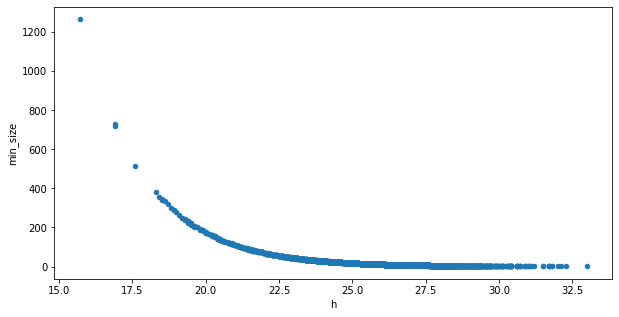

Figure #2


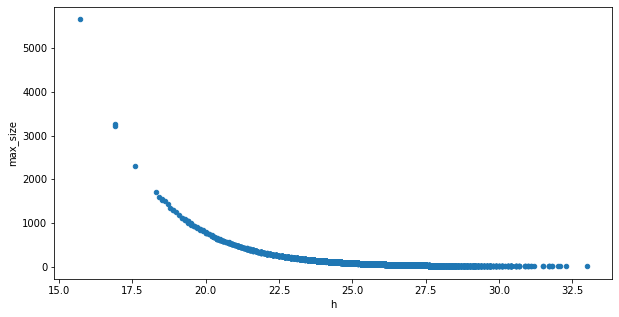

Figure #3


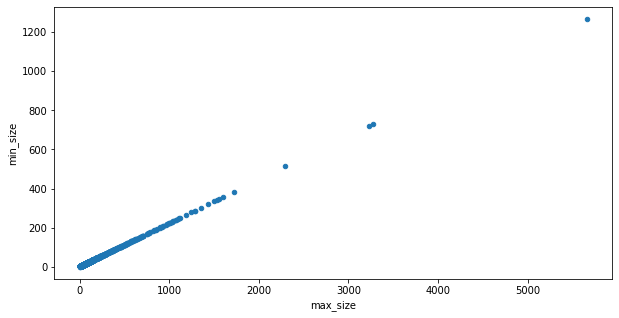

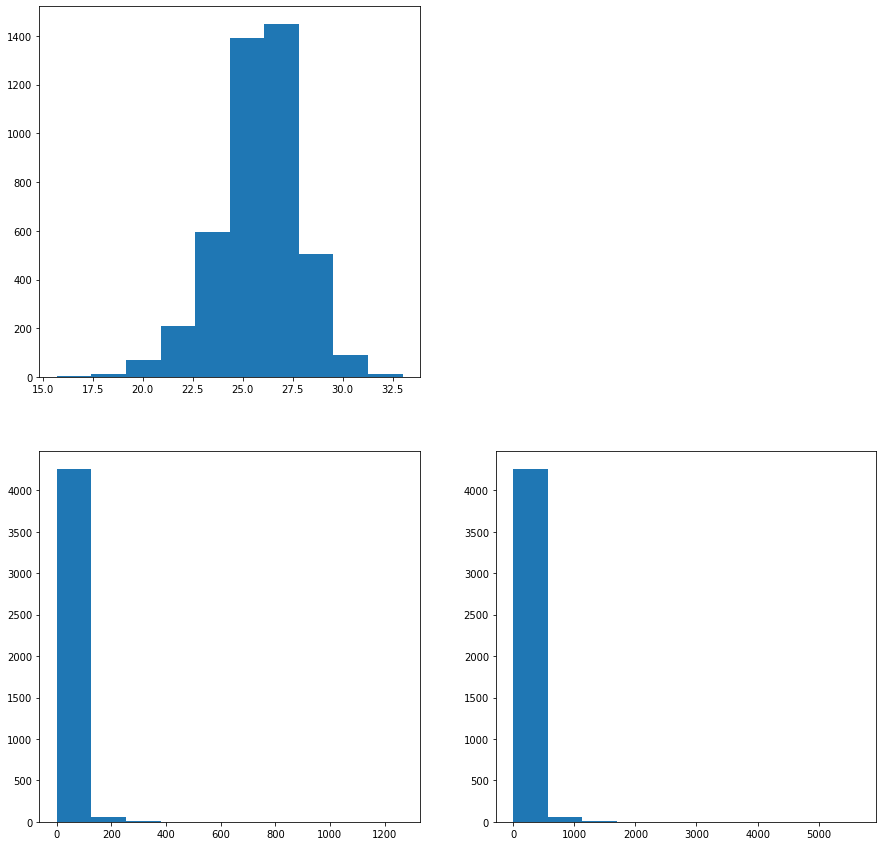

Our conclusion is that the distribution of the height of the meteor is not normal.


In [7]:
clipped_asteroid_mass = data['max_size'].clip(lower=0, upper=300)
log_asteroid_size = data['min_size'].apply(lambda x: np.log(x))

print(data.info())
print(data.head())
print(data.describe())

time.sleep(2)
print()
print()
time.sleep(2)

print("h is the absolute visual magnitude of the object")
print("min_size is the minimum diameter of the object in kilometers or the minimum estimated size of the object")
print("max_size is the maximum diameter of the object in kilometers or the maximum estimated size of the object or ")
time.sleep(3)
print("Figure #1")
fg1 = data.plot(x='h',y='min_size',kind='scatter',figsize=(10,5))	# scatter plot of h vs min_size
plt.show()

print("Figure #2")
fg2 = data.plot(x='h',y='max_size',kind='scatter',figsize=(10,5))	# scatter plot of h vs max_size
plt.show()

print("Figure #3")
fg3 = data.plot(x='max_size',y='min_size',kind='scatter',figsize=(10,5))	# scatter plot of h vs min_size
plt.show()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
ax3.hist(data['min_size'])
ax4.hist(data['max_size'])
ax1.hist(data['h'])
ax2.remove()
plt.show()
time.sleep(3)
conclusion = "Our conclusion, after processing the data, that the distribution of the height of the meteor is not normal."
time.sleep(5)
print(conclusion)
